In [2]:
#checking if notebook is working properly
import pandas as pd
import matplotlib.pyplot as plt

print("Notebook is working!")


Notebook is working!


In [3]:
#import dataset
import pandas as pd

non_vc = pd.read_csv(
    "non-violent_crime_severity_index_csv_2008-12.csv",
    encoding="latin1"
)

non_vc.head()


,Unnamed: 0,Non-violent Crime Severity Index  Baseline 2006 = 100,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Geography (Footnotes in parenthesessee botto...,2008,2009.00,2010.00,2011.00,2012.00
1,Canada (34),88.67,85.03,80.26,74.38,72.50
2,Newfoundland and Labrador,73.6,76.67,83.90,77.57,70.81
3,Prince Edward Island,77.7,74.05,75.03,74.43,82.50
4,Nova Scotia,82.24,81.57,82.99,76.15,75.76


In [4]:
# Display summary statistics
print(non_vc.describe())

# Show data types
print(non_vc.info())

        Unnamed: 2   Unnamed: 3   Unnamed: 4   Unnamed: 5
count    30.000000    30.000000    30.000000    30.000000
mean    164.164333   162.167667   155.480333   154.693333
std     353.676802   355.066791   355.821631   356.436449
min      51.630000    48.320000    45.360000    42.460000
25%      68.865000    66.475000    61.202500    59.252500
50%      78.970000    78.300000    74.405000    70.485000
75%     109.072500   101.732500    94.627500    92.095000
max    2009.000000  2010.000000  2011.000000  2012.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unnamed: 0                                              44 non-null     object 
 1   Non-violent Crime Severity Index  Baseline 2006 = 100  43 non-null     object 
 2   Unnamed: 2                     

In [5]:
import pandas as pd

non_vc_2 = pd.read_csv(
    "non-violent_crime_severity_index_csv_2008-12.csv",
    encoding="latin1",
    skiprows=1
)

non_vc_2.head()


,Geography (Footnotes in parenthesessee bottom of spreadsheet),2008,2009,2010,2011,2012
0,Canada (34),88.67,85.03,80.26,74.38,72.50
1,Newfoundland and Labrador,73.6,76.67,83.90,77.57,70.81
2,Prince Edward Island,77.7,74.05,75.03,74.43,82.50
3,Nova Scotia,82.24,81.57,82.99,76.15,75.76
4,New Brunswick,73.17,70.08,69.47,65.75,69.25


In [6]:
non_vc_2.head()

,Geography (Footnotes in parenthesessee bottom of spreadsheet),2008,2009,2010,2011,2012
0,Canada (34),88.67,85.03,80.26,74.38,72.50
1,Newfoundland and Labrador,73.6,76.67,83.90,77.57,70.81
2,Prince Edward Island,77.7,74.05,75.03,74.43,82.50
3,Nova Scotia,82.24,81.57,82.99,76.15,75.76
4,New Brunswick,73.17,70.08,69.47,65.75,69.25


In [7]:
#renaming columns
non_vc_2.columns = [
    "Geography",
    "2008",
    "2009",
    "2010",
    "2011",
    "2012"
]


In [8]:
non_vc_2.head()

,Geography,2008,2009,2010,2011,2012
0,Canada (34),88.67,85.03,80.26,74.38,72.50
1,Newfoundland and Labrador,73.6,76.67,83.90,77.57,70.81
2,Prince Edward Island,77.7,74.05,75.03,74.43,82.50
3,Nova Scotia,82.24,81.57,82.99,76.15,75.76
4,New Brunswick,73.17,70.08,69.47,65.75,69.25


In [9]:
print(non_vc_2.columns.tolist())


['Geography', '2008', '2009', '2010', '2011', '2012']


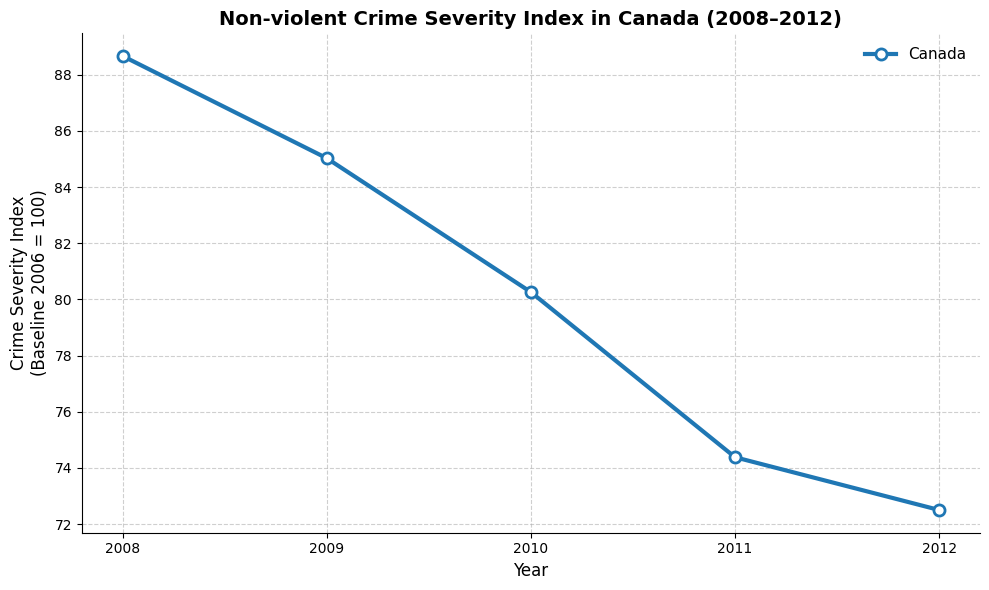

In [10]:
# plot the trend of non-severe crimes in Canada
import matplotlib.pyplot as plt

# Filter Canada data
canada = non_vc_2[non_vc_2["Geography"] == "Canada (34)"]

# Make sure there is data
if canada.empty:
    raise ValueError("No data found for Canada (34)")

# Years as strings (matching column names)
years = ["2008", "2009", "2010", "2011", "2012"]

# Extract values as floats
values = canada[years].iloc[0].astype(float).values  # use .iloc[0] if only one row

# X-axis positions
x_pos = range(len(years))

# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(
    x_pos,
    values,
    label="Canada",
    linewidth=3,
    marker="o",
    markersize=8,
    markerfacecolor="white",
    markeredgewidth=2
)

# Titles and labels
plt.title(
    "Non-violent Crime Severity Index in Canada (2008–2012)",
    fontsize=14,
    fontweight="bold"
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Crime Severity Index\n(Baseline 2006 = 100)", fontsize=12)

# Set x-axis labels to years
plt.xticks(x_pos, years)

# Legend
plt.legend(frameon=False, fontsize=11)

# Grid customization
plt.grid(True, linestyle="--", alpha=0.6)

# Remove top and right spines
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


In [11]:
# Convert the year columns to numeric, coercing errors to NaN
non_vc_2[years] = non_vc_2[years].apply(pd.to_numeric, errors='coerce')

# Drop rows where all year columns are NaN (non-numeric rows)
non_vc_2_numeric = non_vc_2.dropna(subset=years, how='all')

non_vc_2_numeric 

,Geography,2008,2009,2010,2011,2012
0,Canada (34),88.67,85.03,80.26,74.38,72.50
1,Newfoundland and Labrador,73.60,76.67,83.90,77.57,70.81
2,Prince Edward Island,77.70,74.05,75.03,74.43,82.50
3,Nova Scotia,82.24,81.57,82.99,76.15,75.76
4,New Brunswick,73.17,70.08,69.47,65.75,69.25
5,Quebec (34),83.49,82.17,76.34,72.50,68.88
6,Ontario (7),66.41,64.12,60.45,56.40,54.25
7,"Ottawa-Gatineau, Ontario/Quebec (6)",68.65,65.44,61.55,58.09,58.29
8,"Ottawa-Gatineau, Ontario part (6)",66.68,62.60,57.76,56.80,56.50
9,"Kingston, Ontario (8)",70.87,62.99,65.55,63.60,59.83


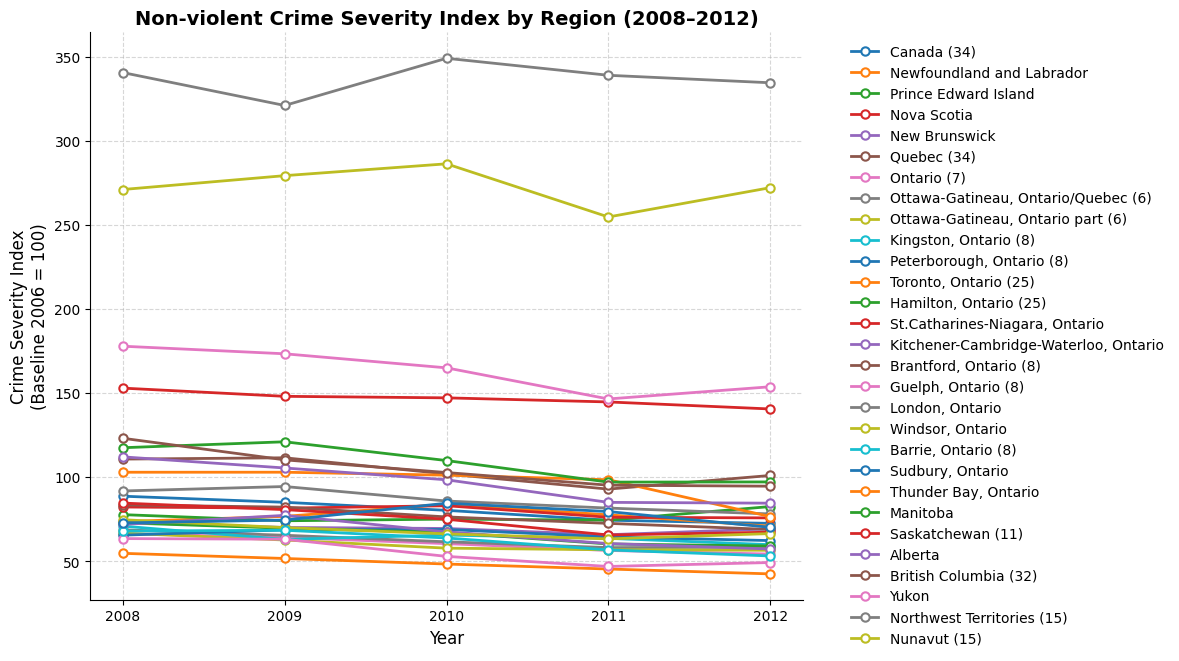

In [12]:
#plotting index for all regions
import matplotlib.pyplot as plt

x_pos = range(len(years))  # positions for x-axis

plt.figure(figsize=(12, 7))

# Loop through numeric rows only
for i, row in non_vc_2_numeric.iterrows():
    region = row["Geography"]
    values = row[years].values 
    plt.plot(
        x_pos,
        values,
        label=region,
        linewidth=2,
        marker="o",
        markersize=6,
        markerfacecolor="white",
        markeredgewidth=1.5
    )

# Titles and labels
plt.title(
    "Non-violent Crime Severity Index by Region (2008–2012)",
    fontsize=14,
    fontweight="bold"
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Crime Severity Index\n(Baseline 2006 = 100)", fontsize=12)

# X-axis labels
plt.xticks(x_pos, years)

# Legend outside the plot
plt.legend(frameon=False, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid and style
plt.grid(True, linestyle="--", alpha=0.5)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


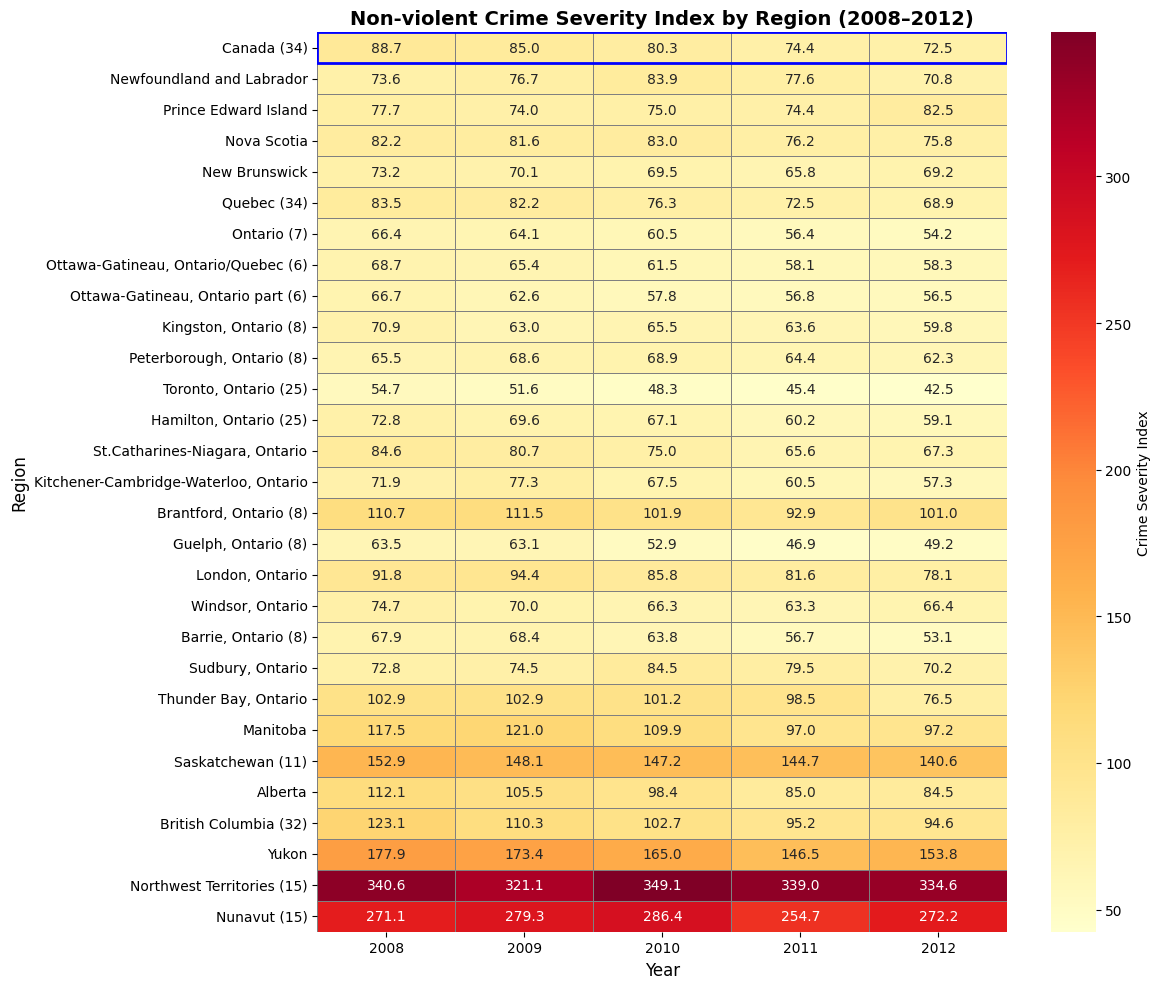

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Set Geography as index for heatmap
heatmap_data = non_vc_2_numeric.set_index("Geography")[years]

plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(
    heatmap_data,
    annot=True,             
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Crime Severity Index'}
)

# Highlight Canada by drawing a rectangle around its row
import matplotlib.patches as patches

ax = plt.gca()
if "Canada (34)" in heatmap_data.index:
    canada_row = heatmap_data.index.get_loc("Canada (34)")
    # Rectangle: x=0 (first column), y=row index, width=number of years, height=1
    rect = patches.Rectangle(
        (0, canada_row), len(years), 1,
        linewidth=2, edgecolor='blue', facecolor='none'
    )
    ax.add_patch(rect)

# Titles and labels
plt.title("Non-violent Crime Severity Index by Region (2008–2012)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Region", fontsize=12)

plt.tight_layout()
plt.show()
